# NYPD Shooting Incident Data Analysis
## (IMPORTANT) Why its in Jupyter instead of RStudio

I had issues with RStudio and decided to make this task as a jupyter notebook applying experience I got in other classes.

## Reproducibility

The notebook is rerunnable and fully reproducible, the only thing you need to is download the data from: https://catalog.data.gov/dataset/nypd-shooting-incident-data-historic

## Data

List of every shooting incident that occurred in NYC going back to 2006 through the end of the previous calendar year.

This is a breakdown of every shooting incident that occurred in NYC going back to 2006 through the end of the previous calendar year. This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning before being posted on the NYPD website. Each record represents a shooting incident in NYC and includes information about the event, the location and time of occurrence. In addition, information related to suspect and victim demographics is also included. This data can be used by the public to explore the nature of shooting/criminal activity. Please refer to the attached data footnotes for additional information about this dataset.

## Data Loading

In [ ]:
import pandas as pd

df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,244608249,05/05/2022,00:10:00,MANHATTAN,INSIDE,14,0.0,COMMERCIAL,VIDEO STORE,True,...,M,BLACK,25-44,M,BLACK,986050.000,214231.000000,40.754692,-73.993500,POINT (-73.9935 40.754692)
1,247542571,07/04/2022,22:20:00,BRONX,OUTSIDE,48,0.0,STREET,(null),True,...,(null),(null),18-24,M,BLACK,1016802.000,250581.000000,40.854402,-73.882330,POINT (-73.88233 40.854402)
2,84967535,05/27/2012,19:35:00,QUEENS,NaN,103,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1048632.000,198262.000000,40.710634,-73.767773,POINT (-73.76777349199995 40.71063412500007)
3,202853370,09/24/2019,21:00:00,BRONX,NaN,42,0.0,NaN,NaN,False,...,M,UNKNOWN,25-44,M,BLACK,1014493.000,242565.000000,40.832417,-73.890714,POINT (-73.89071440599997 40.832416753000075)
4,27078636,02/25/2007,21:00:00,BROOKLYN,NaN,83,0.0,NaN,NaN,False,...,M,BLACK,25-44,M,BLACK,1009149.375,190104.703125,40.688443,-73.910219,POINT (-73.91021857399994 40.68844345900004)


# Preprocessing

I create a consistent column joining date and time for easier future analysis. Also, I exclude geo fields and ID because they don't add value since we're not making any geo analysis.

In [ ]:
df['dtime'] = pd.to_datetime(df['OCCUR_DATE'] + ' ' + df['OCCUR_TIME'])

In [ ]:
df_ = df.drop(['OCCUR_DATE', 'OCCUR_TIME', 'Lon_Lat', 'Latitude', 'Longitude',
         'Y_COORD_CD', 'X_COORD_CD', 'INCIDENT_KEY'],axis=1)

In [ ]:
df_

,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,dtime
0,MANHATTAN,INSIDE,14,0.0,COMMERCIAL,VIDEO STORE,True,25-44,M,BLACK,25-44,M,BLACK,2022-05-05 00:10:00
1,BRONX,OUTSIDE,48,0.0,STREET,(null),True,(null),(null),(null),18-24,M,BLACK,2022-07-04 22:20:00
2,QUEENS,NaN,103,0.0,NaN,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,2012-05-27 19:35:00
3,BRONX,NaN,42,0.0,NaN,NaN,False,25-44,M,UNKNOWN,25-44,M,BLACK,2019-09-24 21:00:00
4,BROOKLYN,NaN,83,0.0,NaN,NaN,False,25-44,M,BLACK,25-44,M,BLACK,2007-02-25 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28557,BRONX,INSIDE,47,0.0,COMMERCIAL,GROCERY/BODEGA,True,18-24,M,BLACK,18-24,M,BLACK,2023-03-19 23:48:00
28558,BRONX,OUTSIDE,41,0.0,STREET,(null),False,25-44,F,BLACK,45-64,M,BLACK,2023-08-16 02:46:00
28559,BRONX,INSIDE,41,0.0,DWELLING,MULTI DWELL - APT BUILD,True,25-44,M,BLACK,25-44,M,BLACK,2023-06-27 12:27:00
28560,QUEENS,OUTSIDE,102,0.0,STREET,BEAUTY/NAIL SALON,False,25-44,M,WHITE HISPANIC,65+,M,ASIAN / PACIFIC ISLANDER,2023-07-08 11:27:00


# Visualizations
## Visualization 1 - Number of Incidents by Year

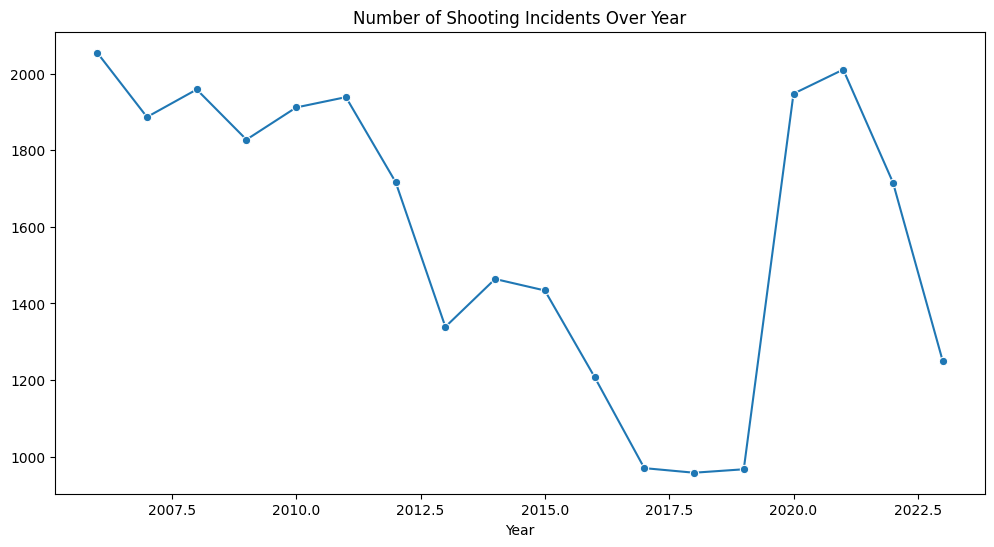

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Year'] = df['dtime'].dt.year
df['Month'] = df['dtime'].dt.month

def plot_dtime(slice):
  incidents_per_year = df[slice].value_counts().sort_index()

  plt.figure(figsize=(12,6))
  sns.lineplot(x=incidents_per_year.index, y=incidents_per_year.values, marker='o')
  plt.title(f'Number of Shooting Incidents Over {slice}')
  plt.xlabel('Year')
  plt.show()

plot_dtime('Year')

## Visualization 2 - Number of Incidents by Month

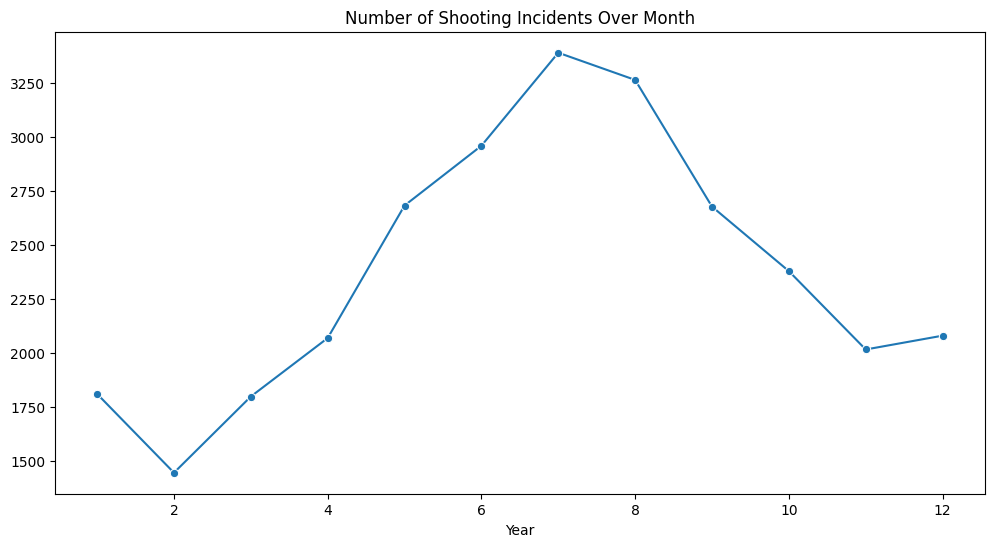

In [ ]:
plot_dtime('Month')

## Visualization 3 - Number of Incidents by Location

<ipython-input-51-a37383f2b815>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=boro_counts.index, y=boro_counts.values, palette='viridis')


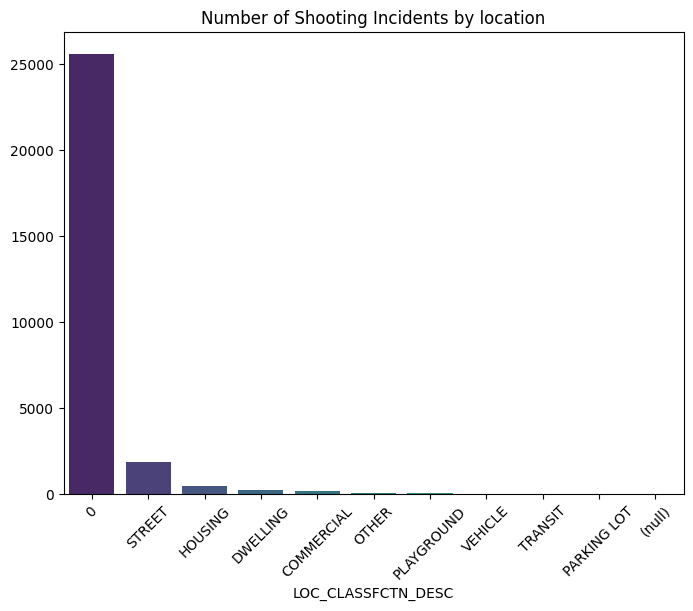

In [ ]:
boro_counts = df['LOC_CLASSFCTN_DESC'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=boro_counts.index, y=boro_counts.values, palette='viridis')
plt.title('Number of Shooting Incidents by location')
plt.xticks(rotation=45)
plt.show()

# Model

I created a model that predicts how likely to be killed in shooting incident based on input parameters.

# Bias Identification
- Reporting. Certain types of incidents are more likely to be reported.
- Temporal. Changes in policies, society can affect the data
- Location. There is more police in some neighborhoods


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

columns = ['BORO', 'PERP_SEX', 'PERP_RACE', 'VIC_SEX', 'VIC_RACE']
df = df[~df['STATISTICAL_MURDER_FLAG'].isna()]
df = df.fillna(0)

X = df[columns]
y = df['STATISTICAL_MURDER_FLAG']

X = X.fillna(0)
y = y.astype(float)

label_encoders = {}
for col in columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_pred = [round(x) for x in y_pred]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      4616
         1.0       0.67      0.00      0.00      1097

    accuracy                           0.81      5713
   macro avg       0.74      0.50      0.45      5713
weighted avg       0.78      0.81      0.72      5713

